# Steal Ling's data

In [1]:
import pandas as pd
import numpy as np

#For plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv('../Ling/AllData.csv')
data = data[data['mean']>10]
data.shape

(5090, 81)

In [3]:
data.sort_values(by='mean').tail()

,App_id,Name,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,...,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,SteamSpyOwnersNew,peak_max,peak_mean,max,mean
12,1172470,Apex Legends,Nov 4 2020,0,0,1,7,88,5,0,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,23823000.0,228439.0,1.670272e+05,126121.06,97200.430000
5,892970,Valheim,Feb 2 2021,0,0,1,0,-1,4,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,15898000.0,498478.0,3.544470e+05,210302.24,152701.566667
1,730,Counter-Strike: Global Offensive,Aug 21 2012,0,0,1,0,83,8,1,...,,Minimum:OS: Ubuntu 12.04Processor: 64-bit Dual...,,Minimum:OS: MacOS X 10.6.6 or higherProcessor:...,,83851000.0,1305714.0,5.562232e+05,857604.22,316635.260189
2,570,Dota 2,Jul 9 2013,0,0,1,0,90,4,0,...,,Minimum:OS: Ubuntu 12.04Processor: Dual core f...,,Minimum:OS: OS X Mavericks 10.9Processor: Dual...,,174686000.0,1291328.0,7.820687e+05,709178.26,452757.727453
0,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,Dec 21 2017,0,0,1,0,86,11,1,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,56061000.0,3236027.0,1.038021e+06,1584886.77,470328.382800


In [4]:
data.sort_values(by='mean').head()

,App_id,Name,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,MovieCount,PackageCount,...,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText,SteamSpyOwnersNew,peak_max,peak_mean,max,mean
5643,986800,AVICII Invector,Dec 10 2019,0,0,1,2,79,3,1,...,,,,,,24000.0,146.0,41.823529,27.09,10.010000
6400,570090,articy:draft 3,Feb 16 2017,0,1,1,0,-1,2,1,...,Recommended:OS: Windows 7+ (64-Bit) or higher...,,,,,1000.0,28.0,20.117647,15.95,10.011961
5242,595770,AirMech Wastelands,Jul 6 2018,0,0,1,0,-1,3,1,...,Recommended:OS: Windows 10 64-bitProcessor: i5...,,,,,19000.0,159.0,29.840909,34.43,10.020000
5746,859180,Monster Castle,Mar 25 2019,0,0,1,0,-1,2,0,...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,Minimum:Requires a 64-bit processor and operat...,Recommended:Requires a 64-bit processor and op...,36000.0,59.0,22.230769,25.25,10.022692
4161,1127110,Outpost,May 1 2020,0,0,1,1,-1,1,0,...,,Minimum:Processor: 2 GHz ProcessorStorage: 100...,,Minimum:Processor: 2 GHz ProcessorStorage: 100...,,124000.0,239.0,33.294118,70.28,10.032353


In [5]:
data.columns

Index(['App_id', 'Name', 'ReleaseDate', 'RequiredAge', 'DemoCount',
       'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount',
       'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'Genr

In [6]:
len(data[data['mean']<20])

1237

In [7]:
len(data[data['mean']>200])

1205

In [80]:
len(data[data['mean']<50])

2560

In [81]:
len(data[data['mean']>50])

2530

# Data Preprocessing: Independent Variables (X) vs Popularity Class (y)

In [8]:
proc_data = data.drop(['App_id','Name','ReleaseDate','Metacritic','SteamSpyOwners', 'SteamSpyOwnersVariance',
                      'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'PriceCurrency','SupportEmail', 
                      'SupportURL', 'AboutText','Background', 'ShortDescrip', 'DetailedDescrip', 'DRMNotice',
                      'ExtUserAcctNotice', 'HeaderImage', 'LegalNotice', 'Reviews','RecommendationCount',
                      'SupportedLanguages', 'Website', 'PCMinReqsText', 'PCRecReqsText',
                      'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText','MacRecReqsText',
                      'SteamSpyOwnersNew', 'peak_max', 'peak_mean', 'max'],axis=1)

In [9]:
proc_data.columns.values

array(['RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount',
       'MovieCount', 'PackageCount', 'PublisherCount', 'ScreenshotCount',
       'AchievementCount', 'AchievementHighlightedCount',
       'ControllerSupport', 'IsFree', 'FreeVerAvail', 'PurchaseAvail',
       'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux',
       'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec',
       'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin',
       'MacReqsHaveRec', 'CategorySinglePlayer', 'CategoryMultiplayer',
       'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase',
       'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor',
       'CategoryVRSupport', 'GenreIsNonGame', 'GenreIsIndie',
       'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports',
       'GenreIsRacing', 'GenreIsMassivelyMultiplayer', 'PriceInitial',
       'PriceFinal', 'mean']

In [82]:
# def create_grades(count):

#         if 200<=count:
#             return 1
#         elif count<20:
#             return 0
#         else:
#             return -1


def create_grades(count):

        if 50<=count:
            return 1
        elif count<50:
            return 0
        else:
            return -1
proc_data['grade']=proc_data['mean'].apply(create_grades)

proc_data.shape

(5090, 49)

In [83]:
data_for_classification=proc_data[(proc_data['grade']==0)|(proc_data['grade']==1)]

In [84]:
data_for_classification.shape

(5090, 49)

In [85]:
print(len(data_for_classification[data_for_classification['grade']==1]))
print(len(data_for_classification[data_for_classification['grade']==0]))

2530
2560


In [86]:
X=data_for_classification.drop(['mean','grade'],axis=1).copy()
X=X.astype(float)
X.head(10)

,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,PublisherCount,ScreenshotCount,AchievementCount,AchievementHighlightedCount,...,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,PriceFinal
0,0.0,0.0,1.0,0.0,11.0,1.0,1.0,30.0,37.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.99,29.99
1,0.0,0.0,1.0,0.0,8.0,1.0,1.0,15.0,167.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.99,14.99
2,0.0,0.0,1.0,0.0,4.0,0.0,1.0,16.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00
3,17.0,0.0,1.0,0.0,12.0,1.0,1.0,11.0,44.0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.99,59.99
4,17.0,0.0,1.0,7.0,10.0,1.0,1.0,22.0,84.0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.99,59.99
5,0.0,0.0,1.0,0.0,4.0,1.0,1.0,18.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,19.99,19.99
6,17.0,0.0,1.0,0.0,9.0,7.0,1.0,24.0,69.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.99,59.99
7,0.0,0.0,1.0,200.0,7.0,2.0,1.0,8.0,100.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.99,29.99
8,0.0,0.0,1.0,8.0,3.0,3.0,1.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.99,4.99
9,0.0,0.0,1.0,4.0,2.0,5.0,1.0,5.0,23.0,10.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.00


In [87]:
y=data_for_classification['grade'].copy()
y.value_counts()

0    2560
1    2530
Name: grade, dtype: int64

# K-nearest neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.base import clone

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 42, 
                                                    shuffle=True,
                                                    stratify=y)

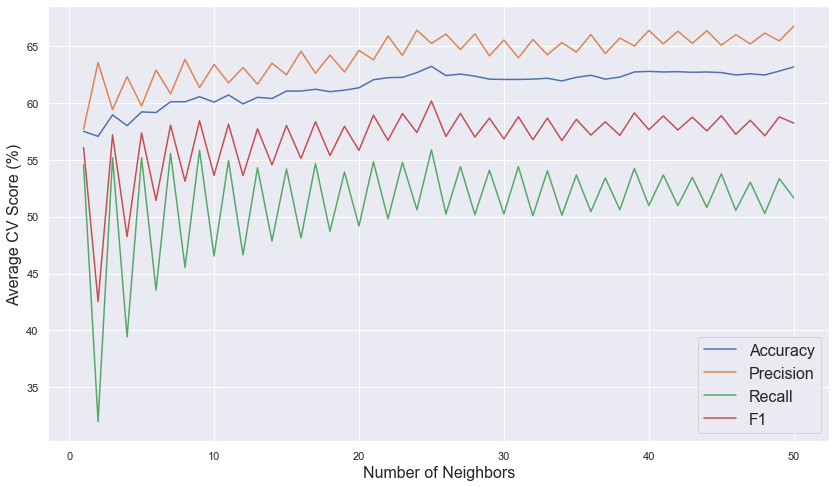

In [90]:
kfold = StratifiedKFold(5,shuffle = True,random_state = 42)

max_neighbors = 50

accs = np.zeros((5,max_neighbors))
prec = np.zeros((5,max_neighbors))
recs = np.zeros((5,max_neighbors))
f1s = np.zeros((5,max_neighbors))

## keep track of the train test split
j = 0

for train_index, test_index in kfold.split(X_train,y_train):
    # Get the cv train test split
    X_train_train, X_train_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_train, y_train_test = y_train.iloc[train_index], y_train.iloc[test_index]
    for i in range(1,max_neighbors+1):
        knn = KNeighborsClassifier(i)
        
        # fit the model
        knn.fit(X_train_train, y_train_train.ravel())
        
        #predict
        y_pred = knn.predict(X_train_test)
        
        #measure accuracy/precision/recall
        accs[j,i-1] = accuracy_score(y_train_test,y_pred)
        prec[j,i-1] = precision_score(y_train_test,y_pred)
        recs[j,i-1] = recall_score(y_train_test,y_pred)
        f1s[j,i-1] = f1_score(y_train_test,y_pred)
        
    j=j+1
    
plt.figure(figsize=(14,8))

plt.plot(range(1,max_neighbors+1), 100*np.mean(accs, axis=0),label='Accuracy')
plt.plot(range(1,max_neighbors+1), 100*np.mean(prec, axis=0),label='Precision')
plt.plot(range(1,max_neighbors+1), 100*np.mean(recs, axis=0),label='Recall')
plt.plot(range(1,max_neighbors+1), 100*np.mean(f1s, axis=0),label='F1')

plt.xlabel("Number of Neighbors", fontsize=16)
plt.ylabel("Average CV Score (%)", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [91]:
# Best accuracy:
knn_best_acc,knn_best_acc_index=(np.max(100*np.mean(accs, axis=0)),np.argmax(100*np.mean(accs, axis=0)))
# Best Precision:
knn_best_prec,knn_best_prec_index=(np.max(100*np.mean(prec, axis=0)),np.argmax(100*np.mean(prec, axis=0)))
# Best Recall:
knn_best_rec,knn_best_rec_index=(np.max(100*np.mean(recs, axis=0)),np.argmax(100*np.mean(recs, axis=0)))
# Best F1-score:
knn_best_f1,knn_best_f1_index=(np.max(100*np.mean(f1s, axis=0)),np.argmax(100*np.mean(f1s, axis=0)))

In [92]:
print('max accuracy:',np.round(knn_best_acc,2),'index:',knn_best_acc_index)
print()
print('max precision:',np.round(knn_best_prec,2),'index:',knn_best_prec_index)
print()
print('max recall:',np.round(knn_best_rec,2),'index:',knn_best_rec_index)
print()
print('max f1-score:',np.round(knn_best_f1,2),'index:',knn_best_f1_index)
print()

max accuracy: 63.22 index: 24

max precision: 66.74 index: 49

max recall: 55.88 index: 24

max f1-score: 60.16 index: 24



In [93]:
knn = KNeighborsClassifier(n_neighbors = knn_best_acc_index+1)

knn.fit(X_train,y_train.ravel())

y_pred = knn.predict(X_test)

print('test accuracy:',np.round(100*accuracy_score(y_test,y_pred),2))
print('test precision:',np.round(100*precision_score(y_test,y_pred),2))
print('test recall:',np.round(100*recall_score(y_test,y_pred),2))
print('test f1-score:',np.round(100*f1_score(y_test,y_pred),2))

test accuracy: 62.45
test precision: 64.82
test recall: 53.55
test f1-score: 58.65


In [94]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[456, 184],
       [294, 339]])

In [95]:
from sklearn.metrics import roc_curve

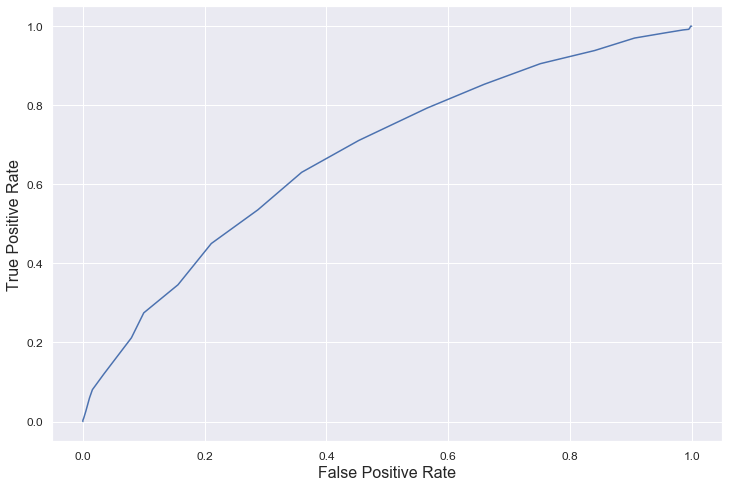

In [96]:
probs = knn.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [97]:
from sklearn.metrics import roc_auc_score

np.round(100*roc_auc_score(y_test,probs[:,1]),2)

67.63

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

log_reg = LogisticRegression(class_weight='balanced')

log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
kfold = StratifiedKFold(5,shuffle=True,random_state=42)

cutoffs = np.arange(0,1,.01)

accs = np.zeros((5,len(cutoffs)))
prec = np.zeros((5,len(cutoffs)))
recs = np.zeros((5,len(cutoffs)))
f1s = np.zeros((5,len(cutoffs)))

log_reg = LogisticRegression(class_weight='balanced')

i = 0
for train_index,test_index in kfold.split(X_train,y_train):
    X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

    for j in range(len(cutoffs)):

        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train,y_train_train)
        probs = log_reg_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs[i,j] = accuracy_score(y_train_test,y_pred)
        prec[i,j] = precision_score(y_train_test,y_pred)
        recs[i,j] = recall_score(y_train_test,y_pred)
        f1s[i,j] = f1_score(y_train_test,y_pred)

    i=i+1

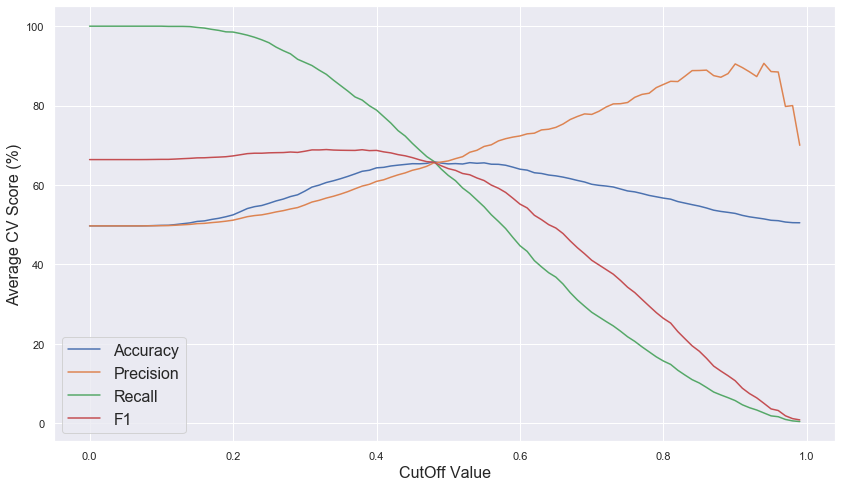

In [101]:
plt.figure(figsize=(14,8))

plt.plot(cutoffs, 100*np.mean(accs, axis=0),label='Accuracy')
plt.plot(cutoffs, 100*np.mean(prec, axis=0),label='Precision')
plt.plot(cutoffs, 100*np.mean(recs, axis=0),label='Recall')
plt.plot(cutoffs, 100*np.mean(f1s, axis=0),label='F1')

plt.xlabel("CutOff Value", fontsize=16)
plt.ylabel("Average CV Score (%)", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [102]:
print("The cutoff with highest mean CV accuracy was",
         cutoffs[np.argmax(np.mean(accs,axis=0))])
print("The cutoff with highest mean CV precision was",
         cutoffs[np.argmax(np.mean(prec,axis=0))])
print("The cutoff with highest mean CV recall was",
         cutoffs[np.argmax(np.mean(recs,axis=0))])
print("The cutoff with highest mean CV F1 score was",
         cutoffs[np.argmax(np.mean(f1s,axis=0))])

The cutoff with highest mean CV accuracy was 0.48
The cutoff with highest mean CV precision was 0.9400000000000001
The cutoff with highest mean CV recall was 0.0
The cutoff with highest mean CV F1 score was 0.33


In [108]:
log_reg = LogisticRegression(class_weight='balanced')

log_reg.fit(X_train,y_train)
probs = log_reg.predict_proba(X_test)[:,1]

#Choose cutoff with highest training set accuracy
y_pred = 1*(probs > cutoffs[np.argmax(np.mean(accs,axis=0))])

print('Test set Accuracy: ',np.round(100*accuracy_score(y_test,y_pred),2))
print('Test set Precision: ',np.round(100*precision_score(y_test,y_pred),2))
print('Test set Recall: ',np.round(100*recall_score(y_test,y_pred),2))
print('Test set F1-score: ',np.round(100*f1_score(y_test,y_pred),2))

Test set Accuracy:  64.49
Test set Precision:  64.25
Test set Recall:  64.45
Test set F1-score:  64.35


In [112]:
log_reg = LogisticRegression(class_weight='balanced')

log_reg.fit(X_train,y_train)
probs = log_reg.predict_proba(X_test)[:,1]

#Choose cutoff with highest training set F-1 score
y_pred = 1*(probs > cutoffs[np.argmax(np.mean(f1s,axis=0))])

print('Test set Accuracy: ',np.round(100*accuracy_score(y_test,y_pred),2))
print('Test set Precision: ',np.round(100*precision_score(y_test,y_pred),2))
print('Test set Recall: ',np.round(100*recall_score(y_test,y_pred),2))
print('Test set F1-score: ',np.round(100*f1_score(y_test,y_pred),2))

Test set Accuracy:  55.15
Test set Precision:  82.29
Test set Recall:  12.48
Test set F1-score:  21.67


In [113]:
confusion_matrix(y_test,y_pred)

array([[623,  17],
       [554,  79]])

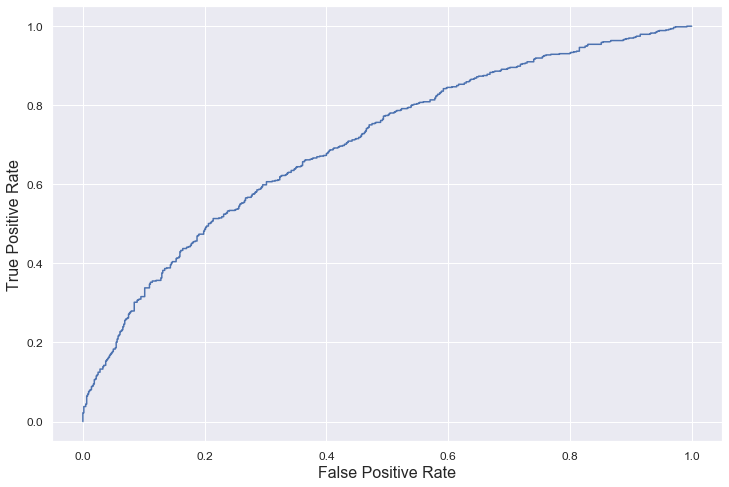

In [114]:
probs = log_reg.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [115]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

70.31

# Support Vector Machine

In [116]:
from sklearn.svm import SVC

In [117]:
svc = SVC()

svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [118]:
import warnings
warnings.filterwarnings('ignore')

kfold = StratifiedKFold(5,shuffle=True,random_state=42)

cutoffs = np.arange(0,1,.01)

accs = np.zeros((5,len(cutoffs)))
prec = np.zeros((5,len(cutoffs)))
recs = np.zeros((5,len(cutoffs)))
f1s = np.zeros((5,len(cutoffs)))

svc = SVC(probability=True)

i = 0
for train_index,test_index in kfold.split(X_train,y_train):
    X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

    for j in range(len(cutoffs)):

        svc_clone = clone(svc)
        svc_clone.fit(X_train_train,y_train_train)
        probs = svc_clone.predict_proba(X_train_test)[:,1]
        
        y_pred = 1*(probs > cutoffs[j])
        accs[i,j] = accuracy_score(y_train_test,y_pred)
        prec[i,j] = precision_score(y_train_test,y_pred)
        recs[i,j] = recall_score(y_train_test,y_pred)
        f1s[i,j] = f1_score(y_train_test,y_pred)

    i=i+1

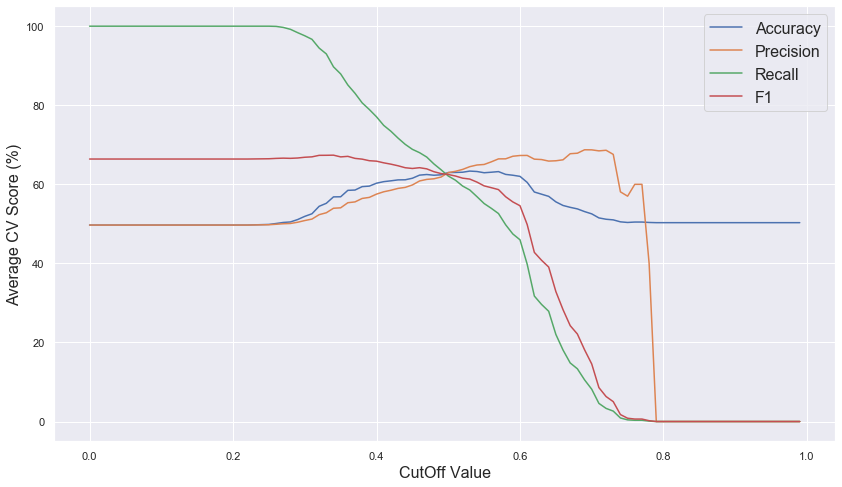

In [119]:
plt.figure(figsize=(14,8))

plt.plot(cutoffs, 100*np.mean(accs, axis=0),label='Accuracy')
plt.plot(cutoffs, 100*np.mean(prec, axis=0),label='Precision')
plt.plot(cutoffs, 100*np.mean(recs, axis=0),label='Recall')
plt.plot(cutoffs, 100*np.mean(f1s, axis=0),label='F1')

plt.xlabel("CutOff Value", fontsize=16)
plt.ylabel("Average CV Score (%)", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [120]:
print("The cutoff with highest mean CV accuracy was",
         cutoffs[np.argmax(np.mean(accs,axis=0))])
print("The cutoff with highest mean CV precision was",
         cutoffs[np.argmax(np.mean(prec,axis=0))])
print("The cutoff with highest mean CV recall was",
         cutoffs[np.argmax(np.mean(recs,axis=0))])
print("The cutoff with highest mean CV F1 score was",
         cutoffs[np.argmax(np.mean(f1s,axis=0))])

The cutoff with highest mean CV accuracy was 0.53
The cutoff with highest mean CV precision was 0.6900000000000001
The cutoff with highest mean CV recall was 0.0
The cutoff with highest mean CV F1 score was 0.34


In [121]:
svc = SVC(probability=True)

svc.fit(X_train,y_train)
probs = svc.predict_proba(X_test)[:,1]

#Choose cutoff with highest training set accuracy
y_pred = 1*(probs > cutoffs[np.argmax(np.mean(accs,axis=0))])

print('Test set Accuracy: ',np.round(100*accuracy_score(y_test,y_pred),2))
print('Test set Precision: ',np.round(100*precision_score(y_test,y_pred),2))
print('Test set Recall: ',np.round(100*recall_score(y_test,y_pred),2))
print('Test set F1-score: ',np.round(100*f1_score(y_test,y_pred),2))

Test set Accuracy:  62.77
Test set Precision:  64.38
Test set Recall:  56.24
Test set F1-score:  60.03


In [122]:
confusion_matrix(y_test,y_pred)

array([[443, 197],
       [277, 356]])

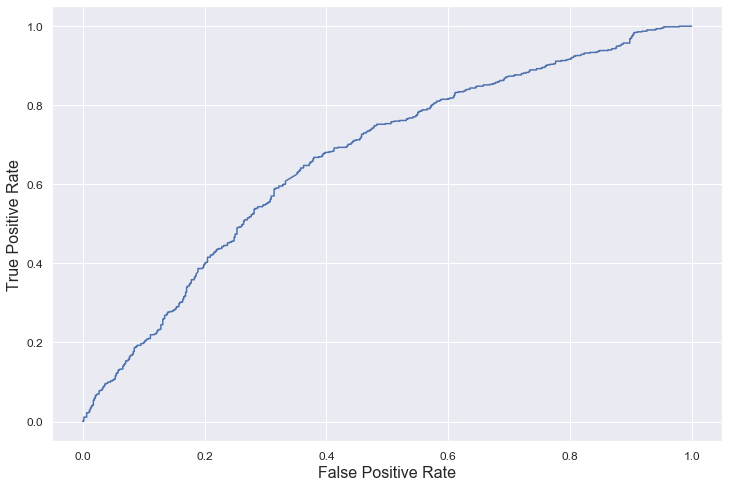

In [123]:
probs = svc.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [124]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

66.72

# Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)

# n will be the maximum max_depth I consider
n = 50

accs = np.zeros((5,n))
prec = np.zeros((5,n))
recs = np.zeros((5,n))
f1s = np.zeros((5,n))

for j in range(1,n+1):
    if j%10==0:
        print(j)
    
    tree = DecisionTreeClassifier(max_depth=j, random_state = 42)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        tree_clone = clone(tree)
        tree_clone.fit(X_train_train,y_train_train)
        
        y_predict = tree_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        prec[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        f1s[i,j-1] = f1_score(y_train_test,y_predict)

        i = i + 1

10
20
30
40
50


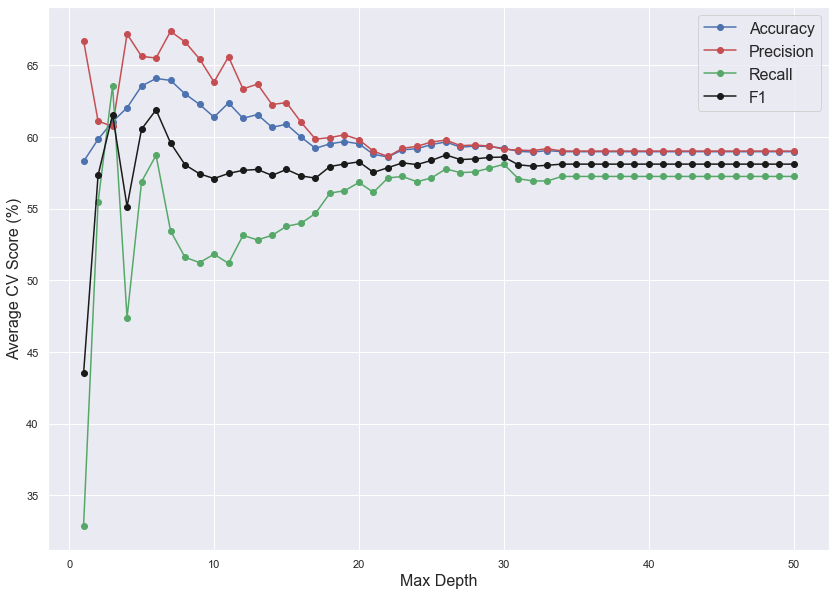

In [127]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), 100*np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), 100*np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), 100*np.mean(recs,axis=0),'g-o', label="Recall")
plt.plot(range(1,n+1), 100*np.mean(f1s,axis=0),'k-o', label="F1")

plt.ylabel("Average CV Score (%)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [128]:
# Best accuracy:
tree_best_acc,tree_best_acc_index=(np.max(100*np.mean(accs, axis=0)),np.argmax(100*np.mean(accs, axis=0)))
# Best Precision:
tree_best_prec,tree_best_prec_index=(np.max(100*np.mean(prec, axis=0)),np.argmax(100*np.mean(prec, axis=0)))
# Best Recall:
tree_best_rec,tree_best_rec_index=(np.max(100*np.mean(recs, axis=0)),np.argmax(100*np.mean(recs, axis=0)))
# Best F1-score:
tree_best_f1,tree_best_f1_index=(np.max(100*np.mean(f1s, axis=0)),np.argmax(100*np.mean(f1s, axis=0)))

In [129]:
print('max accuracy:',np.round(tree_best_acc,2),'index:',tree_best_acc_index)
print()
print('max precision:',np.round(tree_best_prec,2),'index:',tree_best_prec_index)
print()
print('max recall:',np.round(tree_best_rec,2),'index:',tree_best_rec_index)
print()
print('max f1-score:',np.round(tree_best_f1,2),'index:',tree_best_f1_index)
print()

max accuracy: 64.08 index: 5

max precision: 67.37 index: 6

max recall: 63.58 index: 2

max f1-score: 61.89 index: 5



In [130]:
tree = DecisionTreeClassifier(max_depth=tree_best_acc_index+1, random_state = 42)

tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)

print('test accuracy:',np.round(100*accuracy_score(y_test,y_pred),2))
print('test precision:',np.round(100*precision_score(y_test,y_pred),2))
print('test recall:',np.round(100*recall_score(y_test,y_pred),2))
print('test f1-score:',np.round(100*f1_score(y_test,y_pred),2))

test accuracy: 62.92
test precision: 64.15
test recall: 57.66
test f1-score: 60.73


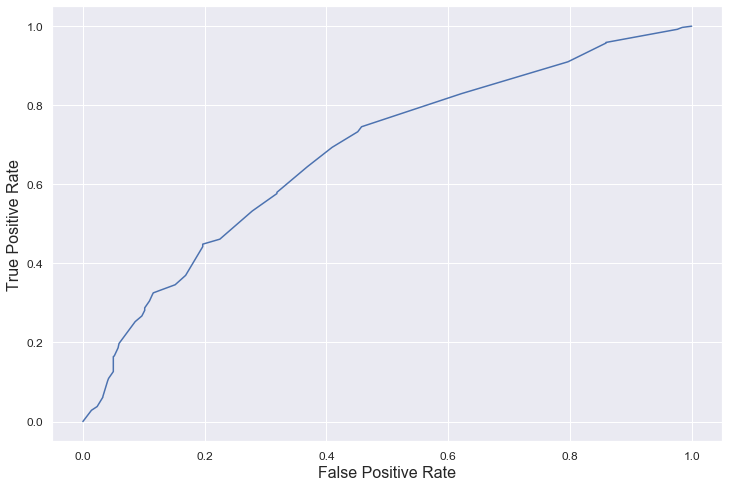

In [131]:
probs = tree.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [132]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

68.0

# Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)

# n will be the maximum max_depth I consider
n = 50

accs = np.zeros((5,n))
prec = np.zeros((5,n))
recs = np.zeros((5,n))
f1s = np.zeros((5,n))

for j in range(1,n+1):
    if j%10==0:
        print(j)
    
    rf = RandomForestClassifier(n_estimators = 500,max_depth=j, random_state = 42)
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_clone = clone(rf)
        rf_clone.fit(X_train_train,y_train_train)
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        prec[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        f1s[i,j-1] = f1_score(y_train_test,y_predict)

        i = i + 1

10
20
30
40
50


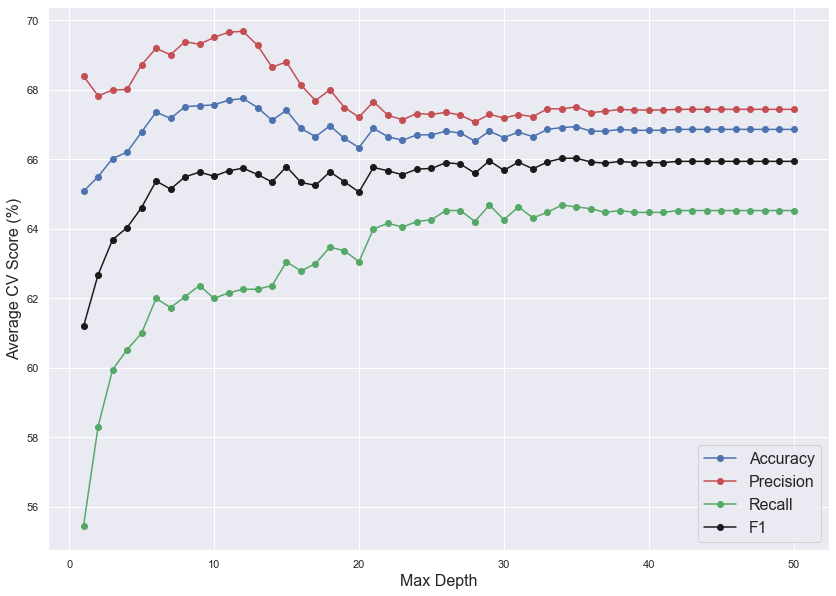

In [135]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), 100*np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), 100*np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), 100*np.mean(recs,axis=0),'g-o', label="Recall")
plt.plot(range(1,n+1), 100*np.mean(f1s,axis=0),'k-o', label="F1")

plt.ylabel("Average CV Score (%)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [136]:
# Best accuracy:
rf_best_acc,rf_best_acc_index=(np.max(100*np.mean(accs, axis=0)),np.argmax(100*np.mean(accs, axis=0)))
# Best Precision:
rf_best_prec,rf_best_prec_index=(np.max(100*np.mean(prec, axis=0)),np.argmax(100*np.mean(prec, axis=0)))
# Best Recall:
rf_best_rec,rf_best_rec_index=(np.max(100*np.mean(recs, axis=0)),np.argmax(100*np.mean(recs, axis=0)))
# Best F1-score:
rf_best_f1,rf_best_f1_index=(np.max(100*np.mean(f1s, axis=0)),np.argmax(100*np.mean(f1s, axis=0)))

In [137]:
print('max accuracy:',np.round(rf_best_acc,2),'index:',rf_best_acc_index)
print()
print('max precision:',np.round(rf_best_prec,2),'index:',rf_best_prec_index)
print()
print('max recall:',np.round(rf_best_rec,2),'index:',rf_best_rec_index)
print()
print('max f1-score:',np.round(rf_best_f1,2),'index:',rf_best_f1_index)
print()

max accuracy: 67.75 index: 11

max precision: 69.68 index: 11

max recall: 64.68 index: 28

max f1-score: 66.03 index: 34



In [138]:
rf = RandomForestClassifier(n_estimators = 500,max_depth=rf_best_acc_index+1, random_state = 42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('test accuracy:',np.round(100*accuracy_score(y_test,y_pred),2))
print('test precision:',np.round(100*precision_score(y_test,y_pred),2))
print('test recall:',np.round(100*recall_score(y_test,y_pred),2))
print('test f1-score:',np.round(100*f1_score(y_test,y_pred),2))

test accuracy: 67.01
test precision: 68.98
test recall: 61.14
test f1-score: 64.82


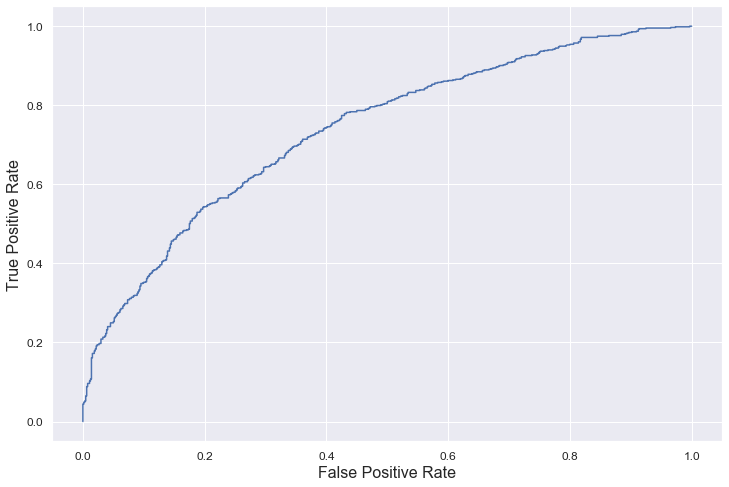

In [139]:
probs = rf.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [140]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

73.69

# AdaBoost

In [141]:
from sklearn.ensemble import AdaBoostClassifier

In [142]:
kfold = StratifiedKFold(n_splits=5,shuffle = True,random_state=42)

# n will be the maximum max_depth I consider
n = 100

accs = np.zeros((5,n))
prec = np.zeros((5,n))
recs = np.zeros((5,n))
f1s = np.zeros((5,n))

for j in range(1,n+1):
    if j%10==0:
        print(j)
    # n_estimators controls how many weak learners we use
    # learning_rate is a hyperparameter that controls how
    # aggressively we correct incorrect labels
    # algorithm is the algorithm that sklearn runs to fit the model
    # SAMME.R or SAMME are the options, SAMME.R allows calculation
    # of probabilities.
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                n_estimators = j,
                algorithm="SAMME.R",
                learning_rate = 0.5
            )
    
    i = 0
    for train_index,test_index in kfold.split(X_train,y_train):
        X_train_train,X_train_test = X_train.iloc[train_index],X_train.iloc[test_index]
        y_train_train,y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        ada_clf_clone = clone(ada_clf)
        ada_clf_clone.fit(X_train_train,y_train_train)
        
        y_predict = ada_clf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        prec[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        f1s[i,j-1] = f1_score(y_train_test,y_predict)

        i = i + 1

10
20
30
40
50
60
70
80
90
100


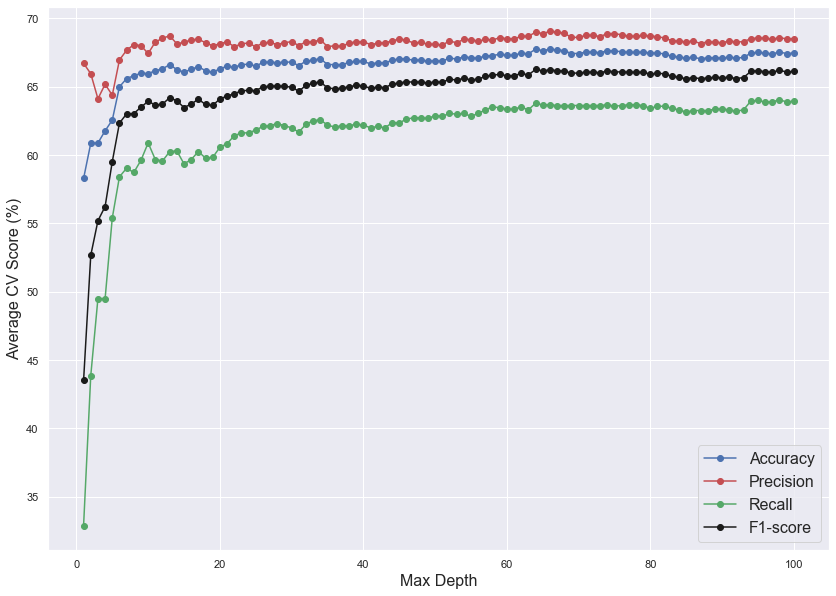

In [143]:
plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), 100*np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), 100*np.mean(prec,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), 100*np.mean(recs,axis=0),'g-o', label="Recall")
plt.plot(range(1,n+1), 100*np.mean(f1s,axis=0),'k-o', label="F1-score")

plt.ylabel("Average CV Score (%)",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [144]:
# Best accuracy:
ada_best_acc,ada_best_acc_index=(np.max(100*np.mean(accs, axis=0)),np.argmax(100*np.mean(accs, axis=0)))
# Best Precision:
ada_best_prec,ada_best_prec_index=(np.max(100*np.mean(prec, axis=0)),np.argmax(100*np.mean(prec, axis=0)))
# Best Recall:
ada_best_rec,ada_best_rec_index=(np.max(100*np.mean(recs, axis=0)),np.argmax(100*np.mean(recs, axis=0)))
# Best F1-score:
ada_best_f1,ada_best_f1_index=(np.max(100*np.mean(f1s, axis=0)),np.argmax(100*np.mean(f1s, axis=0)))

In [145]:
print('max accuracy:',np.round(ada_best_acc,2),'index:',ada_best_acc_index)
print()
print('max precision:',np.round(ada_best_prec,2),'index:',ada_best_prec_index)
print()
print('max recall:',np.round(ada_best_rec,2),'index:',ada_best_rec_index)
print()
print('max f1-score:',np.round(ada_best_f1,2),'index:',ada_best_f1_index)
print()

max accuracy: 67.75 index: 63

max precision: 69.06 index: 65

max recall: 64.05 index: 97

max f1-score: 66.27 index: 63



In [146]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                n_estimators = ada_best_acc_index+1,
                algorithm="SAMME.R",
                learning_rate = 0.5
            )

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)

print('test accuracy:',np.round(100*accuracy_score(y_test,y_pred),2))
print('test precision:',np.round(100*precision_score(y_test,y_pred),2))
print('test recall:',np.round(100*recall_score(y_test,y_pred),2))
print('test f1-score:',np.round(100*f1_score(y_test,y_pred),2))

test accuracy: 65.99
test precision: 67.3
test recall: 61.45
test f1-score: 64.24


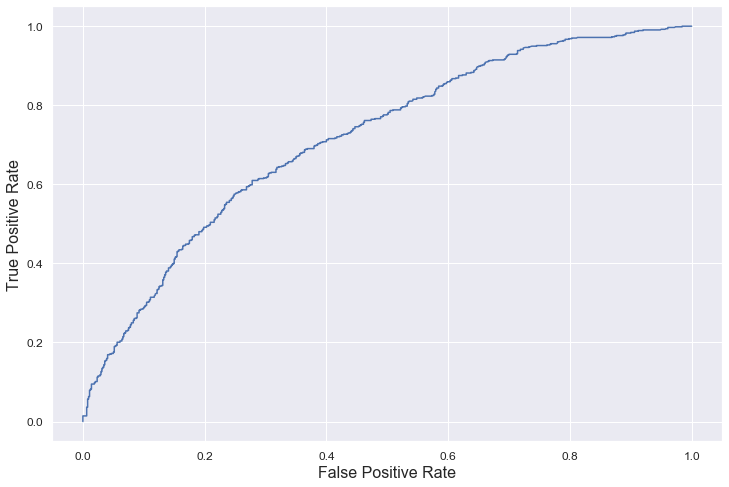

In [147]:
probs = ada.predict_proba(X_test)

fpr,tpr,cutoffs = roc_curve(y_test,probs[:,1])

plt.figure(figsize=(12,8))

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [148]:
np.round(100*roc_auc_score(y_test,probs[:,1]),2)

71.7

In [64]:
# Don't run cells below

In [65]:
# Commented just in case

In [66]:
# #standard: a column name used to rank the games
# #ranks: a list of rank cutoffs

# def grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=(12,12)):
       
#     grade = list(range(1,len(ranks)+1))
#     a = np.array(ranks[1:]+[len(data)] ) - np.array( [0] + ranks[1:])
#     grades = []
#     for i in range(len(grade)):
#         grades.append( [grade[i]]*a[i] )    
#     grades = list(chain(*grades))
    
#     # Sort data according to the 'standard'
#     data_copy=data.copy()
#     data_copy.sort_values(by=[standard], ascending=False, inplace=True)#.reset_index(drop=True)
#     avg_graded = data_copy#.loc[data[standard]>=1].copy()

#     # Rank the games
#     if plot_cutoff:
#         print('Using '+str(standard)+' :')
#         for i in ranks:
#             print('The cutoff for top '+str(i)+' games is '+str(avg_graded.reset_index(drop=True)[standard][i]))

#     cutoffs = [0] + [avg_graded.reset_index(drop=True)[standard][i] for i in ranks[::-1]]
#     #counts  = avg_graded[standard].value_counts(bins=cutoffs, sort=False,dropna=False) 
#     #print(counts)

#     #avg_graded = avg_players.loc[avg_players[standard]>=1].copy()
#     avg_graded['Grade'] = grades

#     data_clean = avg_graded[[#'ReleaseDate', 
#         'CategorySinglePlayer',
#        'CategoryMultiplayer', 
#        'GenreIsIndie', 
#                          'GenreIsAction', 
#                          'GenreIsAdventure', 
#                          'GenreIsCasual',
#        'GenreIsStrategy', 
#                          'GenreIsRPG', 
#                          'GenreIsSimulation','Grade']]

# #threshold = .2
# #data_clean = data_clean.drop(data_clean.mean(axis=0)[data_clean.mean(axis=0) < threshold].index.values,axis=1)

#     data_clean.columns = ['Single', 'Multi', 'Indie',
#        'Action', 'Adventure', 'Casual', 'Strategy',
#        'RPG', 'Simulation', 'Grade']

#     data_test = {}
#     for i in grade:
#         data_test[i] = data_clean.loc[data_clean['Grade']==i].drop(columns=['Grade'])
        
#     if plot_figures:
#         plt.figure(figsize=fig_size)
#         for i in grade:
#             plt.plot(data_test[i].columns,data_test[i].mean(),label='Grade '+str(i))

#         plt.legend()
#         plt.title('By max of Avg_players')
#         plt.show()
#     return data_test

In [67]:
# fig_size=(7,7)
# ranks = list(np.arange(0,3500,500))
# data_max = grade_analysis(ranks,standard='max', plot_cutoff=False,plot_figures=True,fig_size=fig_size)

In [68]:
# import dataframe_image as dfi

In [69]:
# len(data_for_classification.columns.values)

In [70]:
# data_for_classification[data_for_classification.columns.values[:13]].head().style.background_gradient()

In [71]:
# target_for_classification[::2500]

In [72]:
# dfi.export(data_for_classification[data_for_classification.columns.values[:13]].head().style.background_gradient(),
#            'Forppt-features-1.png')
# dfi.export(data_for_classification[data_for_classification.columns.values[13:]].head().style.background_gradient(),
#            'Forppt-features-2.png')

In [73]:
# def create_grades_words(s):
    
# #     arr=np.ones(s.shape)
    
#     arr=[]
    
#     for i in range(len(s)):
#         if s[i]>=10000:
#             arr.append('Very High')
#         elif 1000<=s[i]<10000:
#             arr.append('High')
#         elif 100<=s[i]<1000:
#             arr.append('Low')
#         else:
#             arr.append('Very Low')
#     return pd.Series(arr)

In [74]:
# target_grade=create_grades_words(proc_data['mean'])
# target_grade.unique()

In [75]:
# df_target=(pd.DataFrame({'Avg Players':proc_data['mean'],
#                'Popularity':target_grade,
#                'Target':target_for_classification})
#  .sample(6,random_state=1))

In [76]:
# dfi.export(df_target,'Forppt-target.png')

In [77]:
# df_target

In [78]:
# nrows=2
# ncols=5
# fontsize=20
# target='grade'
# feat=['IsFree','FreeVerAvail','PurchaseAvail','SubscriptionAvail','GenreIsFreeToPlay',
#      'CategorySinglePlayer','CategoryMultiplayer','CategoryCoop','CategoryMMO','GenreIsMassivelyMultiplayer']
# fig, axes = plt.subplots( nrows=nrows, ncols=ncols,figsize=(20,10), sharex=True )

# # [axi.yaxis.set_visible(False) for axi in axes.ravel()]
# j=0
# for r in range(nrows):
#     for c in range(ncols):
#         sns.lineplot(ax=axes[r,c],x=proc_data[target],y=proc_data[feat[j]])
#         axes[r,c].set_title(feat[j],fontsize=fontsize)
#         j=j+1
        
# plt.show()


In [79]:
# len(proc_data.loc[(proc_data['mean']<100) & (proc_data['IsFree']==True)])/len(proc_data[proc_data['mean']<100])

In [80]:
# len(proc_data.loc[(proc_data['mean']>10000) & (proc_data['IsFree']==True)])/len(proc_data[proc_data['mean']>10000])

In [81]:
# nrows=2
# ncols=7
# fontsize=14
# target='grade'
# feat=['PlatformWindows','PlatformLinux','PlatformMac','PCReqsHaveMin','PCReqsHaveRec','LinuxReqsHaveMin',
#      'LinuxReqsHaveRec','MacReqsHaveMin','MacReqsHaveRec','CategoryInAppPurchase','CategoryVRSupport',
#      'CategoryIncludeLevelEditor','ControllerSupport','CategoryIncludeSrcSDK']
# fig, axes = plt.subplots( nrows=nrows, ncols=ncols,figsize=(24,10), sharex=True )

# [axi.yaxis.set_visible(False) for axi in axes.ravel()]
# j=0
# for r in range(nrows):
#     for c in range(ncols):
#         sns.lineplot(ax=axes[r,c],x=proc_data[target],y=proc_data[feat[j]])
#         axes[r,c].set_title(feat[j],fontsize=fontsize)
#         j=j+1
        
# plt.show()

In [82]:
# nrows=2
# ncols=5
# fontsize=14
# target='grade'
# feat=['DemoCount','DeveloperCount','DLCCount','MovieCount','PackageCount','PublisherCount',
#      'ScreenshotCount','AchievementCount','AchievementHighlightedCount','PriceInitial']
# fig, axes = plt.subplots( nrows=nrows, ncols=ncols,figsize=(24,10), sharex=True )

# # [axi.yaxis.set_visible(False) for axi in axes.ravel()]
# j=0
# for r in range(nrows):
#     for c in range(ncols):
#         sns.lineplot(ax=axes[r,c],x=proc_data[target],y=proc_data[feat[j]])
#         axes[r,c].set_title(feat[j],fontsize=fontsize)
#         j=j+1
        
# plt.show()

In [83]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==0)])/len(proc_data[proc_data['grade']==g])

In [84]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==1)])/len(proc_data[proc_data['grade']==g])

In [85]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==2)])/len(proc_data[proc_data['grade']==g])

In [86]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==460)])/len(proc_data[proc_data['grade']==g])

In [87]:
# len(proc_data.loc[(proc_data['grade']==g) & (proc_data['DLCCount']==630)])/len(proc_data[proc_data['grade']==g])

In [88]:
# nrows=2
# ncols=6
# fontsize=14
# target='grade'
# feat=['GenreIsNonGame','GenreIsIndie','GenreIsAction','GenreIsAdventure','GenreIsCasual','GenreIsStrategy',
#      'GenreIsRPG','GenreIsSimulation','GenreIsEarlyAccess','GenreIsSports','GenreIsRacing']
# fig, axes = plt.subplots( nrows=nrows, ncols=ncols,figsize=(24,10), sharex=True )

# [axi.yaxis.set_visible(False) for axi in axes.ravel()]
# j=0
# for r in range(nrows):
#     for c in range(ncols):
#         sns.lineplot(ax=axes[r,c],x=proc_data[target],y=proc_data[feat[j]])
#         axes[r,c].set_title(feat[j],fontsize=fontsize)
#         j=j+1
        
# plt.show()

In [89]:
# plt.figure(figsize=(14,10))

# fontsize=32

# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# plt.suptitle('Random Forest Classifier',fontsize=fontsize+10,color='white')
# plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")

# plt.ylabel("Mean_CV Accuracy Score",fontsize=fontsize,color='white')
# plt.xlabel("Max Depth",fontsize=fontsize,color='white')

# plt.xticks(fontsize=fontsize,color='white')
# plt.yticks(fontsize=fontsize,color='white')

# # plt.legend(fontsize=fontsize)
# plt.savefig('ForPPT-RandomForest-gradevscategorical.jpg', facecolor=f.get_facecolor(), transparent=True,bbox_inches = 'tight')
# plt.show()

In [90]:
# names = []
# scores = []
# for name, score in zip(X_test.columns,rf_clone.feature_importances_):
#     names.append(name)
#     scores.append(np.round(score,4))
    
# score_df = pd.DataFrame({'feature':names,'importance_score':scores})

# score_df.sort_values('importance_score',ascending=False)

In [91]:
# f,ax = plt.subplots(figsize=(10,10))

# fontsize=24
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# plt.suptitle('Random Forest Classifier',fontsize=fontsize+10,color='white')
# sns.barplot(x="importance_score", y="feature", data=score_df.sort_values('importance_score',ascending=False))

# plt.xlabel("Importance Score",fontsize=fontsize,color='white')
# plt.ylabel("Feature",fontsize=fontsize,color='white')

# plt.xticks(fontsize=fontsize-10,color='white')
# # plt.xscale('log')
# # plt.xlim(0.9,2000)

# plt.yticks(fontsize=fontsize-10,color='white')
# # plt.yscale('log')
# # plt.ylim(10**2.5,10**8.2)

# plt.savefig('ForPPT-RandomForest-gradevscategorical-featImp.jpg', 
#             facecolor=f.get_facecolor(), transparent=True,bbox_inches = 'tight')
# # plt.show()

In [92]:
# resid=y_test-y_predict

# sns.histplot(resid)
# plt.xlabel("Target",fontsize=fontsize,color='white')
# plt.ylabel("Errors",fontsize=fontsize,color='white')

# plt.xticks(fontsize=fontsize-10,color='white')
# plt.yticks(fontsize=fontsize-10,color='white')
# plt.show()

# The RandomForest Classifier is pretty bad but results look cool nonetheless!

# Let's now try Voting

In [93]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

# ## The VotingClassifier
# from sklearn.ensemble import VotingClassifier

# ## import accuracy metric
# from sklearn.metrics import accuracy_score

In [94]:
# log_clf = LogisticRegression()
# rf_clf = RandomForestClassifier()
# svm_clf = SVC()
# knn_clf = KNeighborsClassifier()

In [95]:
# voting_clf = VotingClassifier(
#                 [('lr',LogisticRegression()),
#                 ('rf',RandomForestClassifier()),
#                 ('svm',SVC()),
#                 ('knn',KNeighborsClassifier())],
#                 voting = "hard")

In [96]:
voting_clf.fit(X_train,y_train)

NameError: name 'voting_clf' is not defined

In [ ]:
# for name,clf in (["log_clf",log_clf],["rf_clf",rf_clf],
#                  ["svm_clf",svm_clf],["knn_clf",knn_clf],
#                  ["voting_clf",voting_clf]):
#     # fit the model
#     clf.fit(X_train,y_train)
    
#     # predict
#     y_pred = clf.predict(X_test)
    
#     # get acc
#     acc = sum(y_test == y_pred)/len(y_pred)
    
#     print(name, np.round(acc,5))

In [ ]:
# names = []
# scores = []
# for name, score in zip(X_test.columns,ada.feature_importances_):
#     names.append(name)
#     scores.append(np.round(score,8))
    
# score_ada = pd.DataFrame({'feature':names,'importance_score':scores})

# score_ada.sort_values('importance_score',ascending=False)

# f,ax = plt.subplots(figsize=(10,10))

# fontsize=24
# sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# plt.suptitle('AdaBoost Classifier',fontsize=fontsize+10,color='white')
# sns.barplot(x="importance_score", y="feature", data=score_ada.sort_values('importance_score',ascending=False))

# plt.xlabel("Importance Score",fontsize=fontsize,color='white')
# plt.ylabel("Feature",fontsize=fontsize,color='white')

# plt.xticks(fontsize=fontsize-10,color='white')
# # plt.xscale('log')
# # plt.xlim(0.9,2000)

# plt.yticks(fontsize=fontsize-10,color='white')
# # plt.yscale('log')
# # plt.ylim(10**2.5,10**8.2)

# # plt.savefig('ForPPT-AdaBoost-gradevscategorical-featImp.jpg', 
# #             facecolor=f.get_facecolor(), transparent=True,bbox_inches = 'tight')
# plt.show()